Solution found on iteration 3.
Weights:
  w1: 4.143028057568102
  w2: -0.5897369100044678
   b: 1.387143062039815


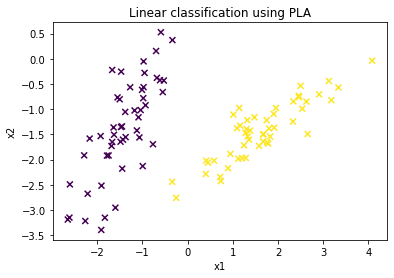

In [1]:
"""Algorithm to separate two linearly separable classes
y = {
    +1: w1*x1 + w2*x2 + b >= 0
    -1: otherwise
}
"""

from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import random

def main():

  # Create labelled test dataset with 2 features (x1, x2)
  N = 100
  X, y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                            n_classes=2, n_clusters_per_class=1, class_sep=1.5, random_state=5)

  # Append a column of `1`s to input (for bias term)
  # X_train has `N` rows of [x1, x2, 1]
  X_train = np.append(X, np.ones(shape=(N, 1)), axis=1)

  # Change `0`s in `y` to `-1`s
  y[y==0] = -1

  # Initialise random weights
  w = np.random.random_sample(X_train.shape[1])
  it = 0

  while classification_error(w, X_train, y) != 0:
    it += 1
    # Pick random misclassified point
    x, s = get_misclassified_point(w, X_train, y)
    # Update weights
    w = w + s*x

  # Print solutions
  report_solution(w, X_train, y, it)


def classification_error(w, X, y):
  """ Returns the number of errors in the PLA with the current `w` """
  # Array of predicted outputs with current `w`
  s = np.sign(X.dot(w))
  # Return number of errors
  return sum(s != y)


def get_misclassified_point(w, X, y):
  """ Returns the input `x` and expected target `s` for a random misclassified point """
  mispts = []

  # Find all misclassified points
  for i in range(len(X)):
    if np.sign(X[i].dot(w)) != y[i]:
      mispts.append((X[i], y[i]))

  return random.choice(mispts)


def report_solution(w, X, y, it):
  """ Reports solution using print statements and graphs """

  # Print statements
  print(f"Solution found on iteration {it}.")
  print("Weights:")
  for idx, weight in enumerate(w):
    if idx == 2:
      print(f"   b: {weight}")
    else:
      print(f"  w{idx+1}: {weight}")

  # Generate scatter plot
  plt.scatter(X[:,0], X[:,1], c=y, marker='x')
  plt.title("Linear classification using PLA")
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.show()

  # todo - draw decision boundary


if __name__ == "__main__":
  main()